In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import exp
%matplotlib inline

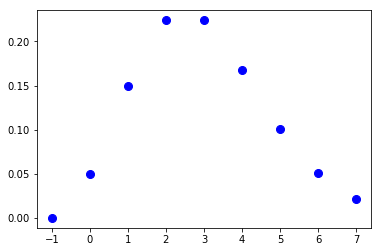

In [13]:
from scipy.stats import poisson
import matplotlib.pyplot as plt
mu = 3

x = np.arange(poisson.ppf(0, mu), poisson.ppf(0.99, mu))
plt.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
plt.show()

# Дискретное распределение

Сгенерируем выборку объёма 100 из дискретного распределения с шестью равновероятными исходами.

In [3]:
sample = np.random.choice([1,2,3,4,5,6], 100)

Представим теперь, что эта выборка была получена не искусственно, а путём подбрасывания симметричного шестигранного кубика 100 раз. Оценим вероятности выпадения каждой из сторон с помощью частот:

In [5]:
# посчитаем число выпадений каждой из сторон:
from collections import Counter

c = Counter(sample)

print("Число выпадений каждой из сторон:")    
print(c)

# теперь поделим на общее число подбрасываний и получим вероятности:
print("Вероятности выпадений каждой из сторон:")
print({k: v/100.0 for k, v in c.items()})

Число выпадений каждой из сторон:
Counter({1: 21, 3: 20, 5: 19, 2: 17, 6: 14, 4: 9})
Вероятности выпадений каждой из сторон:
{1: 0.21, 2: 0.17, 3: 0.2, 4: 0.09, 5: 0.19, 6: 0.14}


Это и есть оценка функции вероятности дискретного распределения.

# Непрерывное распределение

Сгенерируем выборку объёма 100 из стандартного нормального распределения (с $\mu=0$ и $\sigma^2=1$):

In [7]:
norm_rv = sts.norm(0, 1)
sample = norm_rv.rvs(100)

[-0.90131533  0.58756337  0.95955248  0.29434379  0.12748196 -0.05488355
  0.30935186 -0.40947833 -1.64254015 -0.34333524  1.33485667 -0.61701878
 -1.34181264  0.42705284 -0.19430183 -0.22087446 -0.08880287  0.29060713
 -0.17700061 -0.25445881 -0.69641421  0.28730561  1.16796355  1.14007951
 -0.28319771 -1.22867736 -1.46633941  1.41926238 -0.20491928 -0.11330958
  1.03716153 -0.26444988  0.25731479  0.61523408  1.56017393 -0.11320746
 -1.0274789  -0.13654042 -0.09438548  0.18996144  0.8696704   1.26683062
 -1.54789226 -1.0517128   0.11398601 -1.74216687  0.72756242 -1.80890725
 -1.66374686  0.02918896  0.62936359  0.22429654  0.33077022  0.89174925
  2.10241629 -0.08613338 -0.8935736  -0.72752785  2.41999942 -0.2824131
  0.30700429  0.04410172 -1.21195883 -0.85812959 -1.45532051  0.68838322
  0.11902263  1.73575211 -0.61515155 -2.33850383 -1.11244566 -0.14915141
  0.13573565  0.9954232   0.46238136  0.3478902  -0.89481333 -0.93761692
 -1.11202838 -0.68211444  1.79801782 -0.26878082 -0.

Эмпирическая функция распределения для полученной выборки:

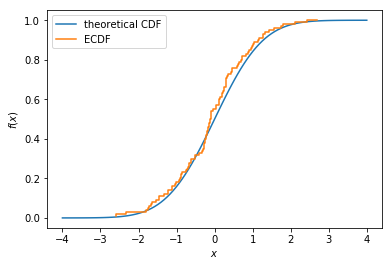

In [9]:
x = np.linspace(-4,4,100)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

Гистограмма выборки:

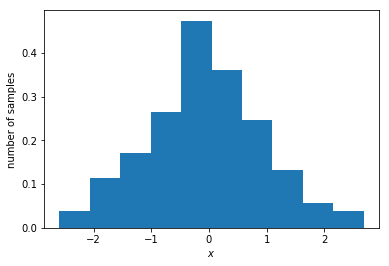

In [10]:
plt.hist(sample, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Попробуем задавать число карманов гистограммы вручную:

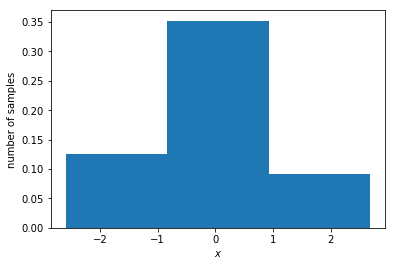

In [11]:
plt.hist(sample, bins=3, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

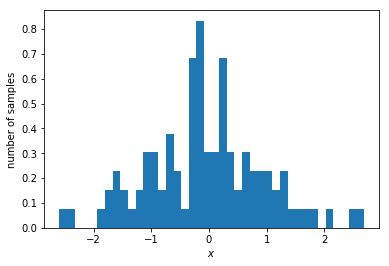

In [12]:
plt.hist(sample, bins=40, normed=True)
plt.ylabel('number of samples')
plt.xlabel('$x$')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

         KDE
0  -0.901315
1   0.587563
2   0.959552
3   0.294344
4   0.127482
5  -0.054884
6   0.309352
7  -0.409478
8  -1.642540
9  -0.343335
10  1.334857
11 -0.617019
12 -1.341813
13  0.427053
14 -0.194302
15 -0.220874
16 -0.088803
17  0.290607
18 -0.177001
19 -0.254459
20 -0.696414
21  0.287306
22  1.167964
23  1.140080
24 -0.283198
25 -1.228677
26 -1.466339
27  1.419262
28 -0.204919
29 -0.113310
..       ...
70 -1.112446
71 -0.149151
72  0.135736
73  0.995423
74  0.462381
75  0.347890
76 -0.894813
77 -0.937617
78 -1.112028
79 -0.682114
80  1.798018
81 -0.268781
82 -0.226226
83  1.266973
84  0.450835
85 -0.507692
86 -0.302073
87 -2.594791
88 -0.660533
89  0.203623
90 -1.718576
91  1.013447
92  0.812408
93 -0.763084
94 -0.089764
95 -0.505716
96  0.718796
97  0.241387
98  2.683775
99 -0.162584

[100 rows x 1 columns]


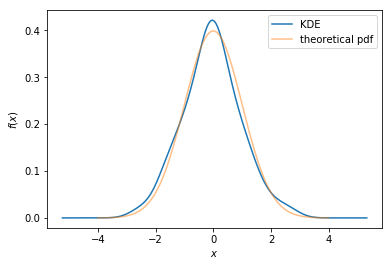

In [13]:
# для построения используем библиотеку Pandas:
df = pd.DataFrame(sample, columns=['KDE'])
print df
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-4,4,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')